# Data Exploration and Dashboard with Amazon Sale Data

## Introduction

In this project, we have an e-commerce sales dataset that comes from [Kaggle](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data).

Examining and deriving meaningful conclusions from e-commerce sales data is extremely important for making data-driven choices that increase sales and profits. Our steps to achieve that are as follows:

- We will import and examine the data and then we'll dive deeper and perform various types of data exploration.
- After checking out most sold products and states with the highest number of orders, we will check out some miscellaneous plots.
- Finally, we will create a dashboard using Looker Studio with the cleaned and improved data that we'll have at the end.

## Importing and Examining the Data

Let's import our data and have a first look.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
file = pd.read_csv("C:/DATABASES/Amazon Sale Report.csv")

In [115]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [116]:
file.shape

(128975, 24)

It seems that some columns have missing values that we'll need to deal with. Let's look at the first five row.

In [117]:
file.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Let's check out all the column names.

In [118]:
file.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

## Data Cleaning

We'll now clean some of the columns. Let's start with ship-state since we'll visualize them later.

In [119]:
file["ship-state"].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

We see that there is no standardation in terms of capitalization and we have different entries for the same states like "PUNJAB" and "Punjab". There are also typos such as "Rajsthan" and "Rajshthan". Let's deal with them quickly.

In [120]:
file["ship-state"] = file["ship-state"].str.lower()
file["ship-state"] = file["ship-state"].str.capitalize()
file["ship-state"].unique()

array(['Maharashtra', 'Karnataka', 'Puducherry', 'Tamil nadu',
       'Uttar pradesh', 'Chandigarh', 'Telangana', 'Andhra pradesh',
       'Rajasthan', 'Delhi', 'Haryana', 'Assam', 'Jharkhand',
       'Chhattisgarh', 'Odisha', 'Kerala', 'Madhya pradesh',
       'West bengal', 'Nagaland', 'Gujarat', 'Uttarakhand', 'Bihar',
       'Jammu & kashmir', 'Punjab', 'Himachal pradesh',
       'Arunachal pradesh', 'Manipur', 'Goa', 'Meghalaya', 'Tripura',
       'Ladakh', 'Dadra and nagar', 'Sikkim', nan, 'Andaman & nicobar ',
       'Rajshthan', 'Nl', 'Mizoram', 'New delhi',
       'Punjab/mohali/zirakpur', 'Rj', 'Orissa', 'Lakshadweep', 'Pb',
       'Apo', 'Ar', 'Pondicherry', 'Rajsthan'], dtype=object)

In [121]:
import warnings
warnings.filterwarnings("ignore")
file["ship-state"][file["ship-state"] == "Rajsthan"] = file["ship-state"][file["ship-state"] == "Rajasthan"] 
file["ship-state"][file["ship-state"] == "Rajshthan"] = file["ship-state"][file["ship-state"] == "Rajasthan"] 
file["ship-state"].unique()

array(['Maharashtra', 'Karnataka', 'Puducherry', 'Tamil nadu',
       'Uttar pradesh', 'Chandigarh', 'Telangana', 'Andhra pradesh',
       'Rajasthan', 'Delhi', 'Haryana', 'Assam', 'Jharkhand',
       'Chhattisgarh', 'Odisha', 'Kerala', 'Madhya pradesh',
       'West bengal', 'Nagaland', 'Gujarat', 'Uttarakhand', 'Bihar',
       'Jammu & kashmir', 'Punjab', 'Himachal pradesh',
       'Arunachal pradesh', 'Manipur', 'Goa', 'Meghalaya', 'Tripura',
       'Ladakh', 'Dadra and nagar', 'Sikkim', nan, 'Andaman & nicobar ',
       'Nl', 'Mizoram', 'New delhi', 'Punjab/mohali/zirakpur', 'Rj',
       'Orissa', 'Lakshadweep', 'Pb', 'Apo', 'Ar', 'Pondicherry'],
      dtype=object)

There can still be further cleaning but this should serve our purposes. We'll finally fill null values with "Unknown".

In [122]:
file["ship-state"] = file["ship-state"].fillna("Unknown")

## Data Exploration 1: Most Sold Products

We'll now check out the most sold products in various ways. We'll first check and visualize it by the number of orders and then we'll do the same for the gross revenue. We'll also check out the sizes of the clothes sold where possible.

### Most Sold Products: by Style and Size

The column "SKU" stands for "stock keeping unit". An example SKU is "SET389-KR-NP-S". the "-S" at the end stands for size choice of the customer. If we want to check out the popular products, we need to trim these (S, L, XXL etc)

In [123]:
file["SKU_split"] = file["SKU"].str.split("-")
file["SKU_split"].head()

0    [SET389, KR, NP, S]
1    [JNE3781, KR, XXXL]
2      [JNE3371, KR, XL]
3         [J0341, DR, L]
4    [JNE3671, TU, XXXL]
Name: SKU_split, dtype: object

In [124]:
file["SKU_size"] = file["SKU_split"].str[-1]
file["SKU_size"].head()

0       S
1    XXXL
2      XL
3       L
4    XXXL
Name: SKU_size, dtype: object

The column "Style" has the ID for the products.

In [125]:
file["Style"].head()

0     SET389
1    JNE3781
2    JNE3371
3      J0341
4    JNE3671
Name: Style, dtype: object

Now, it's time to group by style and size and visualize our findings.

In [126]:
gb_sku = file.groupby(by=["Style","SKU_size"])["Qty"].count()
gb_sku = gb_sku.to_frame()
gb_sku = gb_sku.reset_index()

In [127]:
gb_sku = gb_sku.sort_values("Qty", ascending=False)
gb_sku.head()

,Style,SKU_size,Qty
4462,JNE3797,L,850
4463,JNE3797,M,817
4464,JNE3797,S,706
4465,JNE3797,XL,540
2680,JNE3405,L,535


In [128]:
gb_sku_first_10 = gb_sku[:24]
gb_sku_first_10

,Style,SKU_size,Qty
4462,JNE3797,L,850
4463,JNE3797,M,817
4464,JNE3797,S,706
4465,JNE3797,XL,540
2680,JNE3405,L,535
1336,J0230,M,507
4466,JNE3797,XS,462
1337,J0230,S,452
2682,JNE3405,S,443
4467,JNE3797,XXL,429


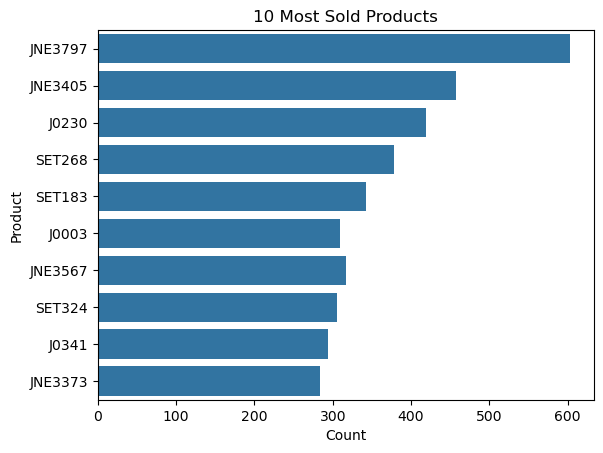

In [129]:
sns.barplot(data=gb_sku_first_10, x="Qty",y="Style",orient='h',errorbar=None)
plt.title("10 Most Sold Products")
plt.xlabel("Count")
plt.ylabel("Product")
plt.show()

JNE3797 is the products that has been ordered the most. Let's check out the same products but with size knowledge as well.

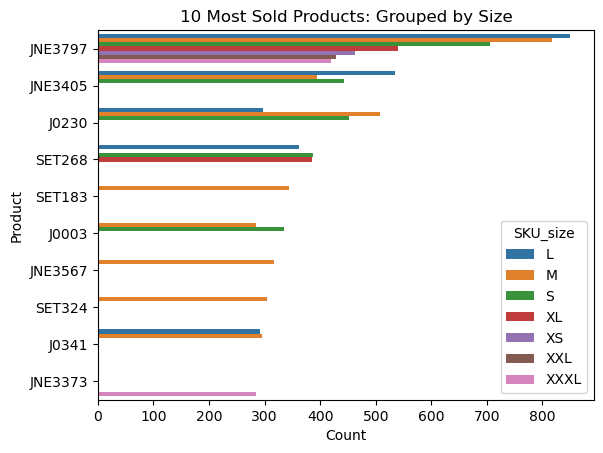

In [130]:
sns.barplot(data=gb_sku_first_10, x="Qty",y="Style", hue="SKU_size",orient='h')
plt.title("10 Most Sold Products: Grouped by Size")
plt.xlabel("Count")
plt.ylabel("Product")
plt.show()

Some of the products don't seem to have different sizes. At this point, finding out what the products actually are could be an important step. Either way, we have a valuable and insightful visualization. Large and Medium sizes of JNE3797 are the most common sizes. For the third product, J0230, the most popular size is Medium.

### Most Sold Products: by gross revenue

In this section, we'll check out the total value of each products. In order to calculate the gross revenue of the products, we again need to group by Style.

In [131]:
gb_sku_price = file.groupby(by=["Style"])["Amount"].sum()
gb_sku_price = gb_sku_price.to_frame()
gb_sku_price["Amount"] = gb_sku_price["Amount"].astype(int)
gb_sku_price = gb_sku_price.sort_values("Amount",ascending=False)
gb_sku_price.head(5)

,Amount
Style,
JNE3797,2933482
J0230,1944948
SET268,1303923
J0341,1275322
J0003,981973


In [132]:
gb_sku_price_top_10 = gb_sku_price[:10]

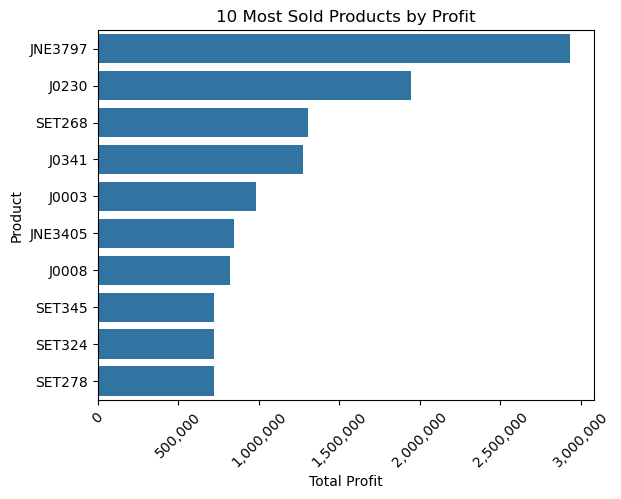

In [133]:
ax = sns.barplot(data=gb_sku_price_top_10, x="Amount",y="Style",orient='h')
plt.title("10 Most Sold Products by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Product")
plt.ticklabel_format(axis = 'x', style= 'plain')

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()

We again have interesting insights. JNE3797 is still the number one product in terms of gross revenue, but the second product with the highest revenue was the third most sold product in out previous plot. The second most sold product, JNE3405, is at the 6th place in terms of revenue.

## Data Exploration 2: States

In this chapter, we'll see the distribution of orders by states. We already did the necessary data cleaning for this section. So, we can start by grouping the data by states.

In [134]:
gb_state_order_number = file.groupby(by=["ship-state"])["Qty"].count()
gb_state_order_number = gb_state_order_number.to_frame()
gb_state_order_number = gb_state_order_number.reset_index()
gb_state_order_number.head(20)

,ship-state,Qty
0,Andaman & nicobar,257
1,Andhra pradesh,5430
2,Apo,1
3,Ar,1
4,Arunachal pradesh,146
5,Assam,1663
6,Bihar,2114
7,Chandigarh,333
8,Chhattisgarh,909
9,Dadra and nagar,70


We will now create an interactive plot for the number of orders from each state.

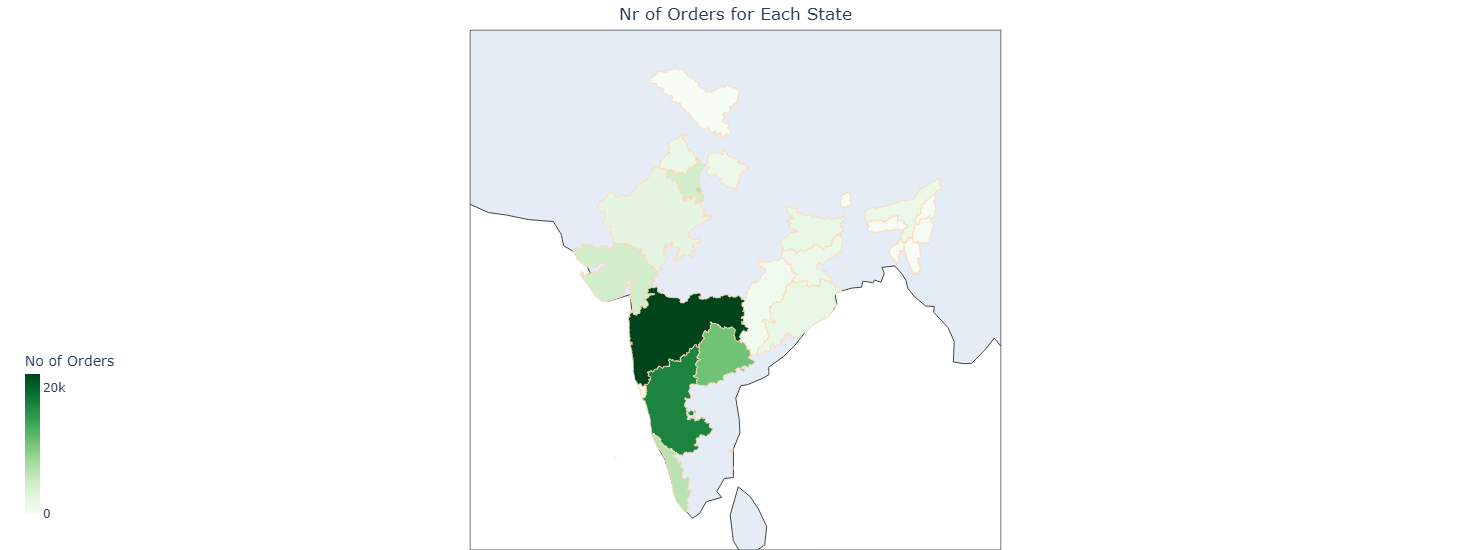

In [144]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=gb_state_order_number["ship-state"],
    z=gb_state_order_number['Qty'],

    autocolorscale=False,
    colorscale='Greens',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "No of Orders"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=20000,

        xanchor='left',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=True,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Nr of Orders for Each State",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)

fig.show()

We see that the top three states are Maharashtra, Karnataka and Telangana.

## Data Exploration 3: Miscellaneous

Let's create some miscellaneous plots to better understand the data. The information we discover here can help us build the dashboard as well.

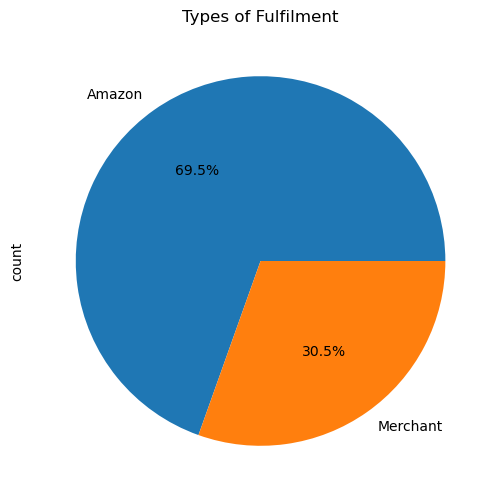

In [136]:
file["Fulfilment"].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')
plt.title("Types of Fulfilment")
plt.show()

More than two thirds of the purchases are fulfilled by Amazon.

In [137]:
file["Status"].value_counts()

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

The "Status" column has too many types for "Shipped". Let's combine them since we won't need this level of detail in our visualization.

In [138]:
def status_cleaner(entry):
    templist = ["Shipped","Cancelled","Pending"] 
    if entry in templist:
        return entry
    else:
        return "Shipped"

In [139]:
file["Status_cleaned"] = file["Status"].apply(status_cleaner)
file["Status_cleaned"].value_counts()

Status_cleaned
Shipped      109985
Cancelled     18332
Pending         658
Name: count, dtype: int64

Let's visualize our newly cleaned column.

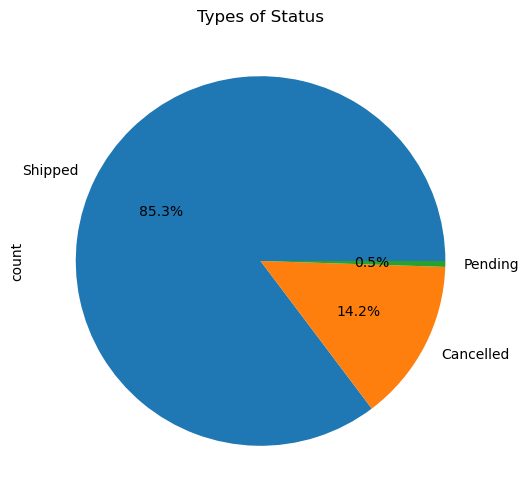

In [140]:
file["Status_cleaned"].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')
plt.title("Types of Status")
plt.show()

## Dashboard

In order to create a visualization grouped by state in Looker, we need to add the [ISO 3166-2](https://en.wikipedia.org/wiki/ISO_3166-2) codes of the states. So, let's do that.

In [141]:
import pycountry

state_names_codes = {}
for state in file["ship-state"].unique():
    try:
        code = pycountry.subdivisions.search_fuzzy(state)[0].code
        state_names_codes[state] = code
    except LookupError:
        state_names_codes[state] = "Unknown"
state_names_codes

{'Maharashtra': 'IN-MH',
 'Karnataka': 'IN-KA',
 'Puducherry': 'IN-PY',
 'Tamil nadu': 'IN-TN',
 'Uttar pradesh': 'IN-UP',
 'Chandigarh': 'IN-CH',
 'Telangana': 'IN-TS',
 'Andhra pradesh': 'IN-AP',
 'Rajasthan': 'IN-RJ',
 'Delhi': 'IN-DL',
 'Haryana': 'IN-HR',
 'Assam': 'IN-AS',
 'Jharkhand': 'IN-JH',
 'Chhattisgarh': 'IN-CG',
 'Odisha': 'IN-OD',
 'Kerala': 'IN-KL',
 'Madhya pradesh': 'IN-MP',
 'West bengal': 'IN-WB',
 'Nagaland': 'IN-NL',
 'Gujarat': 'IN-GJ',
 'Uttarakhand': 'IN-UK',
 'Bihar': 'IN-BR',
 'Jammu & kashmir': 'Unknown',
 'Punjab': 'IN-PB',
 'Himachal pradesh': 'IN-HP',
 'Arunachal pradesh': 'IN-AR',
 'Manipur': 'IN-MN',
 'Goa': 'IN-GA',
 'Meghalaya': 'IN-ML',
 'Tripura': 'IN-TR',
 'Ladakh': 'IN-LA',
 'Dadra and nagar': 'IN-DH',
 'Sikkim': 'IN-SK',
 'Unknown': 'Unknown',
 'Andaman & nicobar ': 'Unknown',
 'Nl': 'NL-AW',
 'Mizoram': 'IN-MZ',
 'New delhi': 'Unknown',
 'Punjab/mohali/zirakpur': 'Unknown',
 'Rj': 'RU-RYA',
 'Orissa': 'Unknown',
 'Lakshadweep': 'IN-LD',
 'Pb': 

In [142]:
file["state_code"] = ""
def code_finder(state):
    return state_names_codes[state]

file["state_code"] = file["ship-state"].apply(code_finder)
file.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,SKU_split,SKU_size,Status_cleaned,state_code
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,400081.0,IN,NaN,False,Easy Ship,NaN,"[SET389, KR, NP, S]",S,Cancelled,IN-MH
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,"[JNE3781, KR, XXXL]",XXXL,Shipped,IN-KA
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,"[JNE3371, KR, XL]",XL,Shipped,IN-MH
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,605008.0,IN,NaN,False,Easy Ship,NaN,"[J0341, DR, L]",L,Cancelled,IN-PY
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,600073.0,IN,NaN,False,NaN,NaN,"[JNE3671, TU, XXXL]",XXXL,Shipped,IN-TN


state_code is successfully added. Let's export our file and go to Looker Studio.

In [143]:
file.to_csv("out.csv")

### Final Result of the Dashboard

Attached below is the final result of our dashboard. Feel free to check it for yourself [here](https://lookerstudio.google.com/reporting/7becd531-3ca3-4d51-8e5a-25424b452b61).

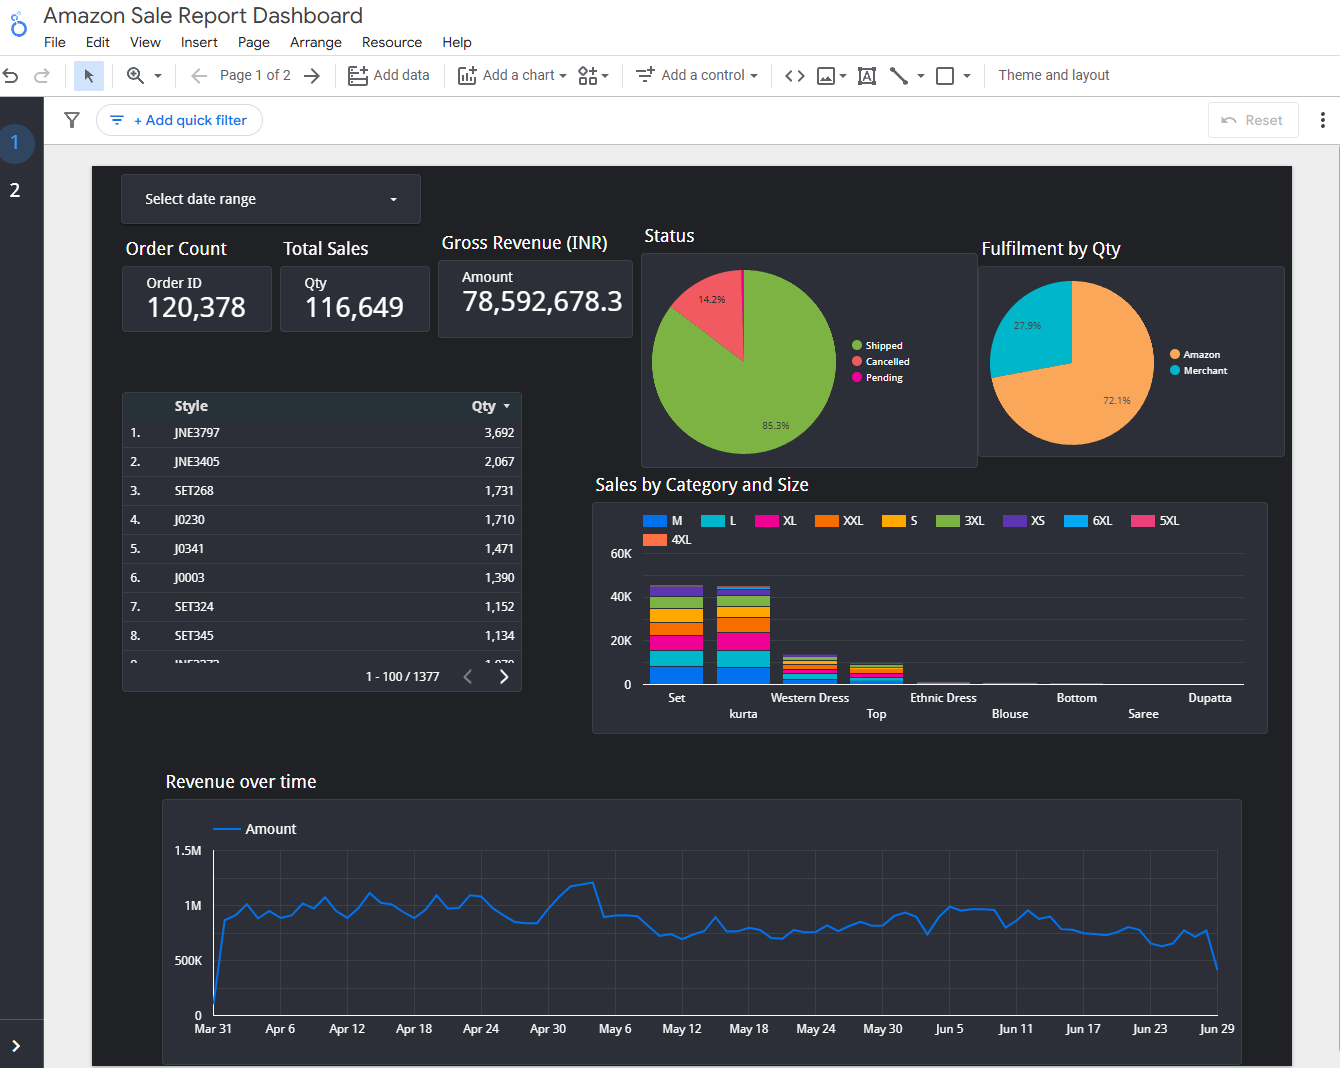

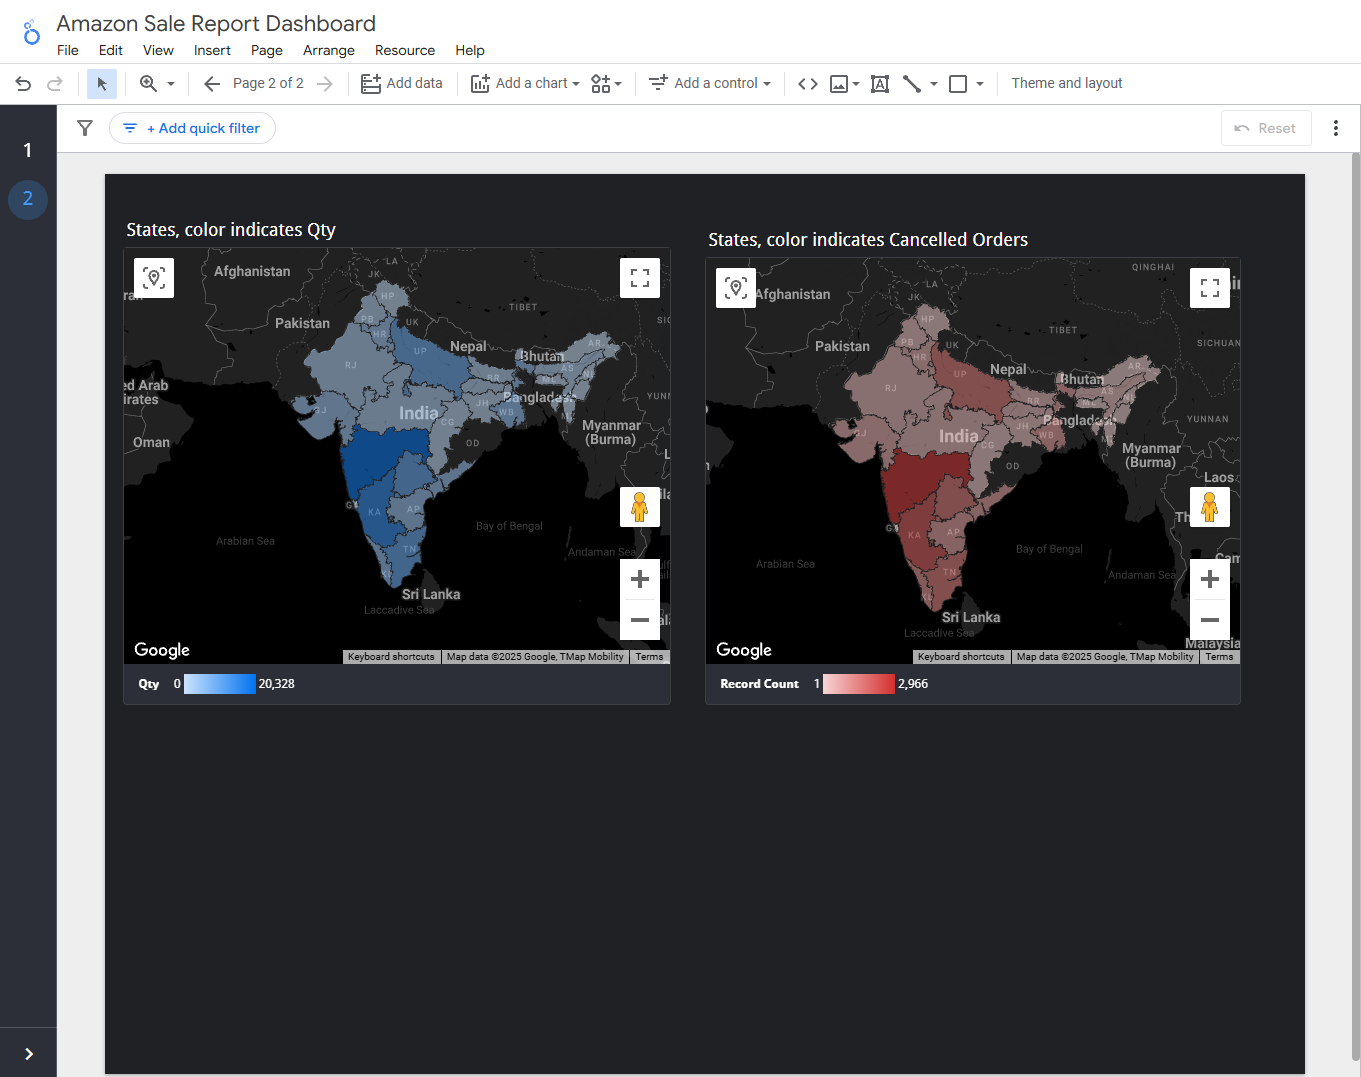

## Conclusion

We examined, cleaned and explored e-commerce data from Amazon and created informative visualizations where possible. We lastly created an interactive dashboard where the date can be controlled and metrics can be filtered by various fields. Possible future steps could include converting the currency into USD, visualizing by cities and checking out promotions used.

**Thanks for reading!**